In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import pandas as pd

from IdealDataInterface import IdealDataInterface

### Specify the input folder incorrectly

In [3]:
folder_path = 'NOT_A_PATH'
ideal = IdealDataInterface(folder_path)

Found entries for 0 sensor readings.


/Users/yangzhihan/Desktop/di/DS4D/assignment2/IAM_Data/Python/IdealDataInterface.py:40: UserWarning: The specified folder path does not seem to contain any sensor reading files.
  warnings.warn('The specified folder path does not seem to contain any sensor reading files.')


### Load the API

In [4]:
folder_path = '/xafs/inf.ed.ac.uk/group/ideal/DataSharing/PublicReleaseCandidates/IDEALsensordata_v0.1/csv'
ideal = IdealDataInterface(folder_path)

Found entries for 0 sensor readings.


/Users/yangzhihan/Desktop/di/DS4D/assignment2/IAM_Data/Python/IdealDataInterface.py:40: UserWarning: The specified folder path does not seem to contain any sensor reading files.
  warnings.warn('The specified folder path does not seem to contain any sensor reading files.')


### Which room types are available?

In [2]:
ideal.room_types()

NameError: name 'ideal' is not defined

### What categories are available?

In [5]:
ideal.categories()

NameError: name 'ideal' is not defined

### Search for some sensors

In [7]:
ideal.view(homeid=105, subtype='hot-water-hot-pipe')

,homeid,roomid,room_type,category,subtype,sensorid
0,105,1110,kitchen,tempprobe,hot-water-hot-pipe,5083


In [7]:
ideal.view(homeid=105, subtype='sink')

,homeid,roomid,room_type,category,subtype,sensorid


In [6]:
data = ideal.get(sensorid=[5083, 5247])

len(data)

0

In [5]:
# Each item in data is a dictionary
data[0].keys()

NameError: name 'data' is not defined

### Resample the temperature readings and combine them in one DataFrame

In [11]:
data[0]['subtype']

'sink'

In [12]:
assert data[0]['subtype'] == 'sink'

ts_hot_water = data[1]['readings']
ts_sink = data[0]['readings']

In [9]:
ts_hot_water = ts_hot_water.resample('5min').mean()
ts_sink = ts_sink.resample('5min').mean()

NameError: name 'ts_hot_water' is not defined

In [14]:
ts_combined = pd.concat([ts_hot_water, ts_sink], axis=1)

ts_combined /= 10

ts_combined.head()

,sensor_5083,sensor_5247
time,,
2017-04-25 13:10:00,28.777778,NaN
2017-04-25 13:15:00,28.184211,NaN
2017-04-25 13:20:00,27.645833,NaN
2017-04-25 13:25:00,33.100000,NaN
2017-04-25 13:30:00,47.825000,NaN


### Have a peak into how that looks

NameError: name 'ts_combined' is not defined

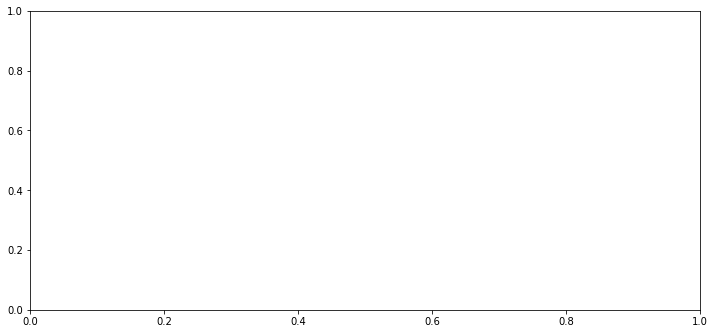

In [8]:
fig, ax = plt.subplots(figsize=(12,5.5))

idx = (ts_combined.index >= '2017-05-19') & (ts_combined.index < '2017-05-20')

ts_combined[idx].plot(ax=ax);